### Project Description
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.
In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 
In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 


### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None

In [2]:
df = pd.read_csv(r"C:\Users\kiran\Desktop\datatrained\Internship\Final Evaluation projets\Third-Phase-Evaluation-Projects--1-\Insurance Claim Fraud Detection\Automobile_insurance_fraud.csv")
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [3]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

1.	months_as_customer: Number of months of patronage
2.	age: the length of time a customer has lived or a thing has existed
3.	policy_number: It is a unique id given to the customer, to track the subscription status and other details of customer
4.	policy_bind_date:date which document that is given to customer after we accept your proposal for insurance
5.	policy_state: This identifies who is the insured, what risks or property are covered, the policy limits, and the policy period
6.	policy_csl: is basically Combined Single Limit
7.	policy_deductable: the amount of money that a customer is responsible for paying toward an insured loss
8.	policy_annual_premium: This means the amount of Regular Premium payable by the Policyholder in a Policy Year
9.	umbrella_limit: This means extra insurance that provides protection beyond existing limits and coverages of other policies
10.	insured_zip: It is the zip code where the insurance was made
11.	insured_sex: This refres to either of the two main categories (male and female) into which customer are divided on the basis of their reproductive functions
12.	insured_education_level: This refers to the Level of education of the customer
13.	insured_occupation: This refers Occupation of the customer
14.	insured_hobbies: This refers to an activity done regularly by customer in his/her leisure time for pleasure.
15.	insured_relationship: This whether customer is: single; or. married; or. in a de facto relationship (that is, living together but not married); or. in a civil partnership
16.	capital-gains: This refers to profit accrued due to insurance premium
17.	capital-loss: This refers to the losses incurred due to insurance claims
18.	incident_date: This refers to the date which claims where made by customers
19.	incident_type: This refers to the type of claim/vehicle damage made by customer
20.	collision_type: This refers to the area of damage on the vehicle
21.	incident_severity: This refers to the extent/level of damage
22.	authorities_contacted: This refers to the government agencies that were contacted after damage
23.	incident_state: This refers to the state at which the accident happened
24.	incident_city: This refers to the city at which the accident happened
25.	1ncident_location: This refers to the location at which the accident happened
26.	incident_hour_of_the_day: The period of the day which accident took place
27.	number_of_vehicles_involved: This refers to number of vehicles involved the accident
28.	property_damage: This refers to whether property was damaged or not
29.	bodily_injuries: This refers to injuries sustained
30.	witnesses: This refers to the number of witnesses involved
31.	police_report_available: This refers to whether the report on damage was documented or not
32.	total_claim_amount: This refers to the financial implications involved in claims
33.	injury_claim: This refers to physical injuries sustained
34.	property_claim: This refers to property damages during incident
35.	vehicle_claim: This refers to property damages during incident
36.	auto_make: This refers to the make of the vehicle
37.	auto_model: This refers to the model of the vehicle
38.	auto_year: This refers to the year which the vehicle was manufactured
39.	_c39:
40.	fraud_reported

#### Analising basic metrics

In [4]:
df.shape

(1000, 40)

In [5]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

##### Findings

- There are Null Values only in _c39 column
- All Values of_c39 are null therefore this columncan be removed

In [6]:
df.drop(columns='_c39',inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [8]:
df.nunique().sort_values(ascending=False)

policy_number                  1000
incident_location              1000
insured_zip                     995
policy_annual_premium           991
policy_bind_date                951
total_claim_amount              763
vehicle_claim                   726
injury_claim                    638
property_claim                  626
months_as_customer              391
capital-loss                    354
capital-gains                   338
incident_date                    60
age                              46
auto_model                       39
incident_hour_of_the_day         24
auto_year                        21
insured_hobbies                  20
auto_make                        14
insured_occupation               14
umbrella_limit                   11
insured_education_level           7
incident_state                    7
incident_city                     7
insured_relationship              6
authorities_contacted             5
witnesses                         4
collision_type              

In [9]:
# Convert the 'date_column' to datetime data type
df['incident_date'] = pd.to_datetime(df['incident_date'])
df['policy_bind_date'] =  pd.to_datetime(df['policy_bind_date'])

In [10]:
for i in df.columns:
    print (i,'\n',df[i].unique(),end='\n\n\n')

months_as_customer 
 [328 228 134 256 137 165  27 212 235 447  60 121 180 473  70 140 160 196
 460 217 370 413 237   8 257 202 224 241  64 166 155 114 149 147  62 289
 431 199  79 116  37 106 269 265 163 355 175 192 430  91 223 195  22 439
  94  11 151 154 245 119 215 295 254 107 478 128 338 271 222 120 270 319
 194 227 244  78 200 284 275 153  31  41 127  61 207 219  80 325  29 239
 279 350 464 118 298  87 261 453 210 168 390 258 225 164 255 206 203 211
 274  81 280 112  24  93 171 124 287 122 398 214 209  82 193 288 104 101
 375 461 428  45 136 216 278 108  14 276  47  73 294 324  53 426 111  86
 296 125 177 238 449 252 359  19 285  30 342 468 343 404  63 335 142 272
  69  38 281 246 330 362 371 377 172  99 249 190 174  95   2 117 242 440
  20 208 156 232  84 394  35 369 332 243 264  32 259 186 201 436 189 105
  88  40  59  39 123 231 247  48 267 286 253  10 158   1  85 233 266  97
 399 305 129 283  96 176 159 290 299  66 334 429  15 230 250  65 475  77
 229 110 292 451 150 291 162 3

We can observe '?' insted of null values they are needed to be treated

In [11]:
df=df.replace('?',np.nan)


In [12]:

for i in df.columns:
    if df[i].isnull().sum() > 0:
        df[i] = df[i].fillna(df[i].mode()[0])



In [13]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


Data Visualization

In [14]:
num_col = []
obj_col = []
cat_col = []
ncat_col = []
for i in df.columns:
    if df[i].nunique() <= 7:
        cat_col.append(i)
    else:
        ncat_col.append(i)

    if df[i].dtype == object:
        obj_col.append(i)
    else :
        num_col.append(i)      

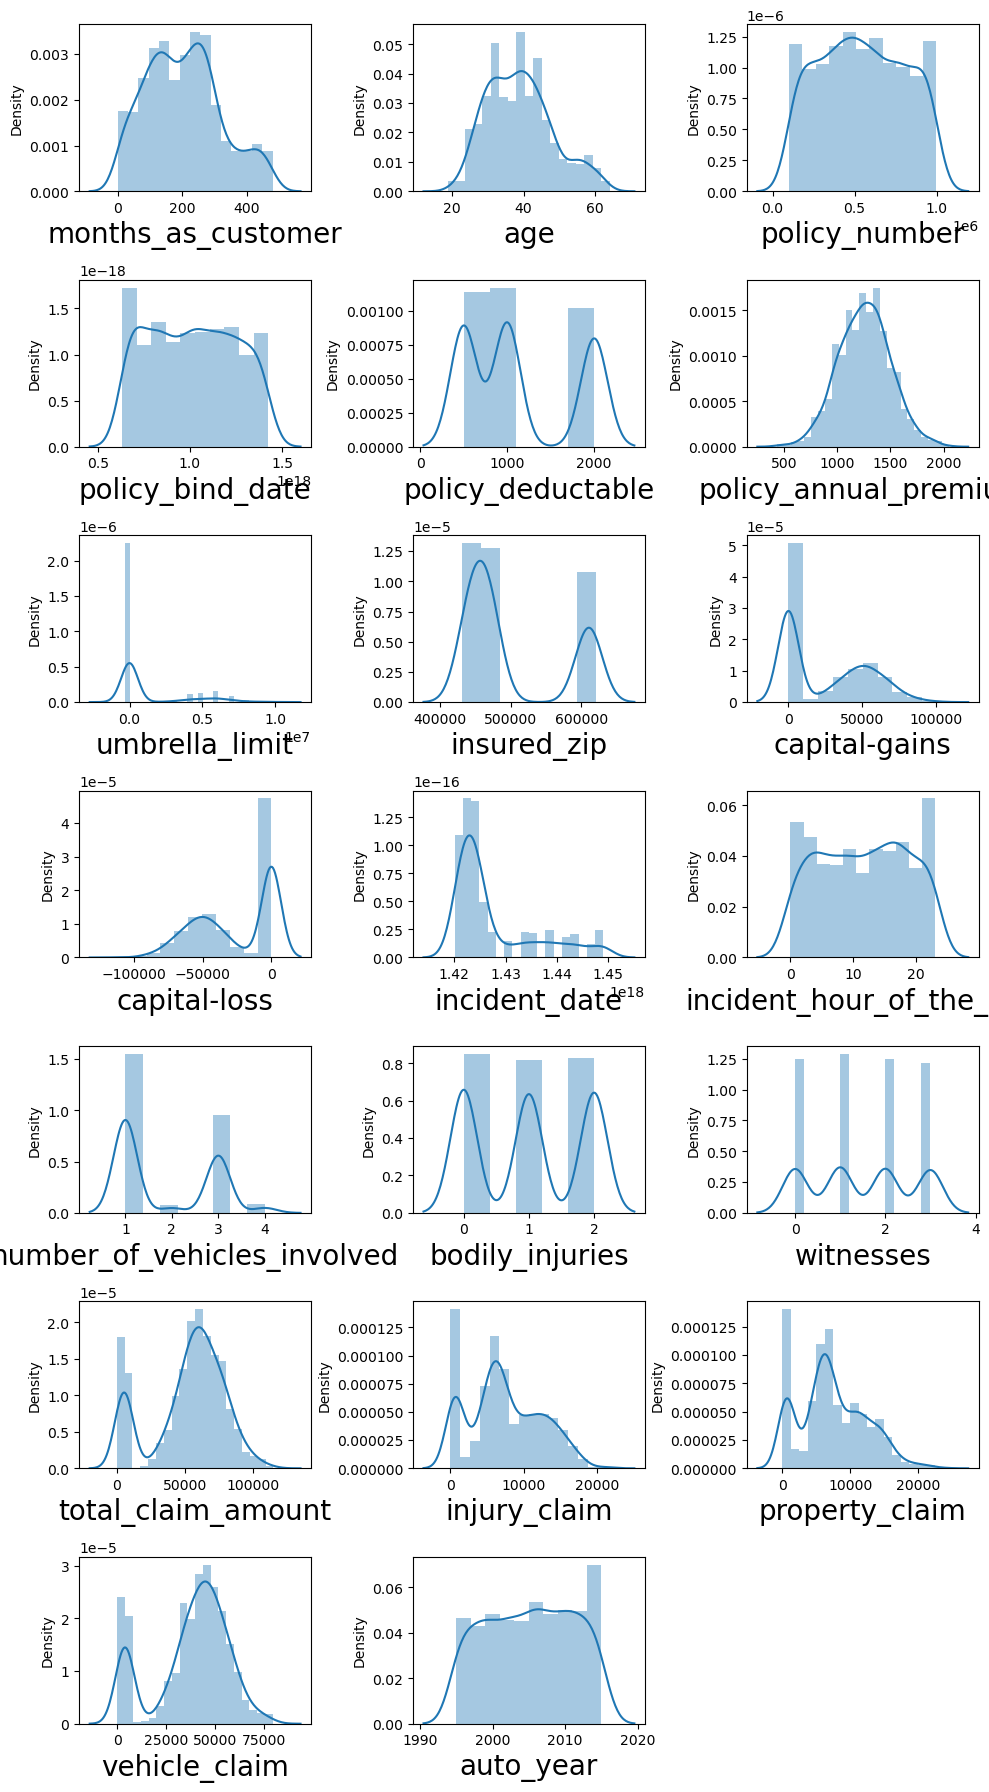

In [15]:
plt.figure(figsize=(10,20))
pn = 1
for column in num_col:
    
    sns.distplot(df[column],ax=plt.subplot(8,3,pn))
    plt.xlabel(column,fontsize = 20)
    pn +=1
    
plt.tight_layout()      

- We can observe that Most of the columns are skewed (Not Normally Distrubuted)

<AxesSubplot: xlabel='auto_make', ylabel='count'>

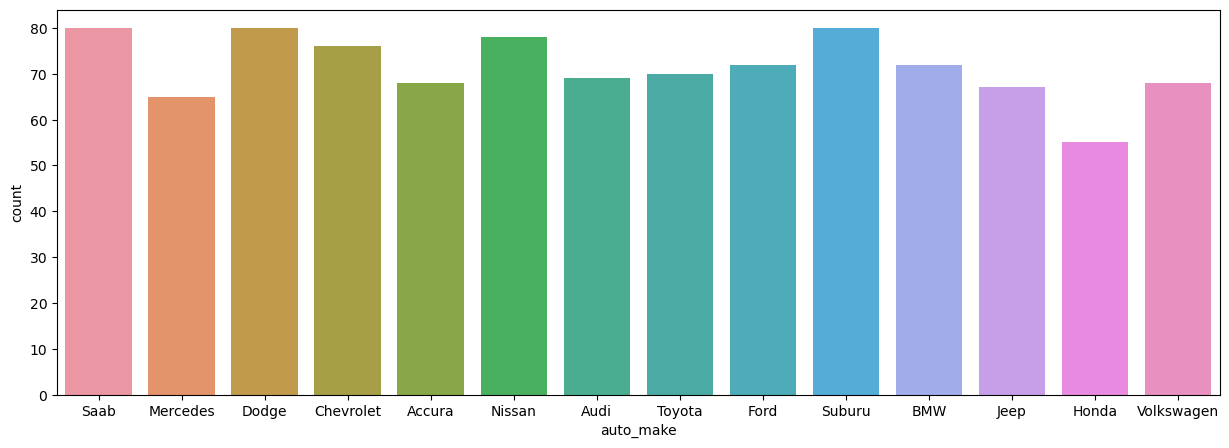

In [16]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x='auto_make')

Saab,Dodge and Suburu have Highest claim Count and Honda has Least Claim Count

<AxesSubplot: xlabel='insured_sex', ylabel='count'>

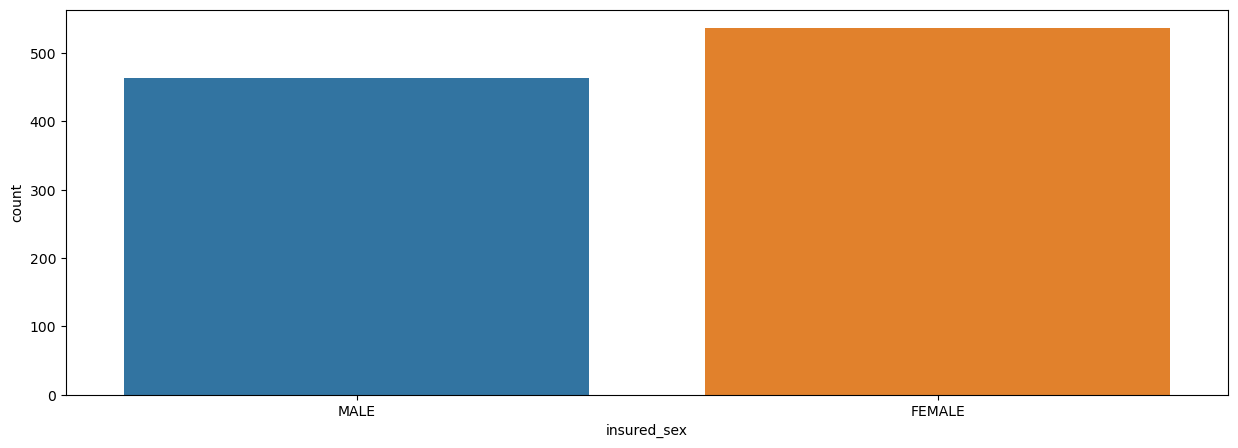

In [17]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x='insured_sex')

Most of the Insured People are Female

<AxesSubplot: xlabel='policy_csl', ylabel='count'>

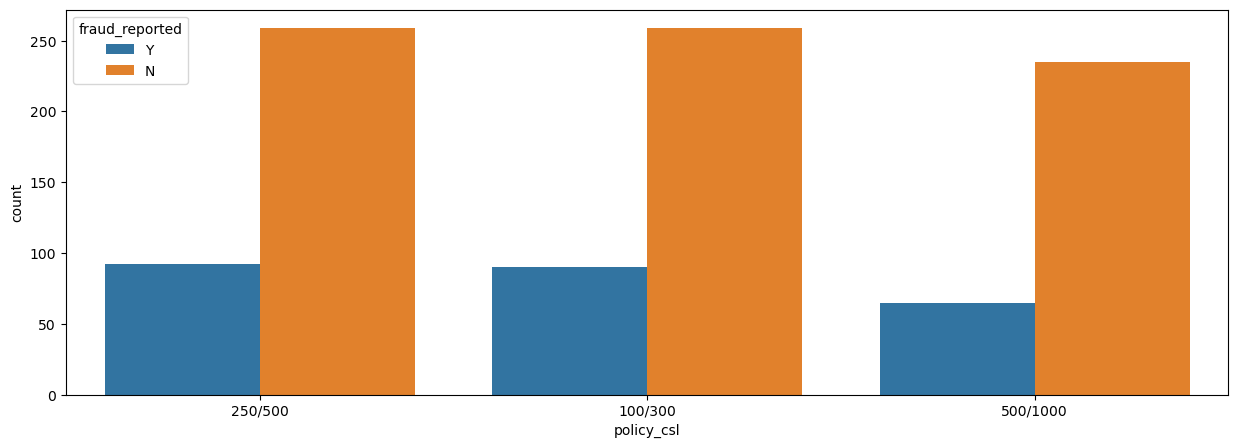

In [18]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x='policy_csl',hue = 'fraud_reported')

There seems no relation between policy_csl and count

<AxesSubplot: xlabel='number_of_vehicles_involved', ylabel='count'>

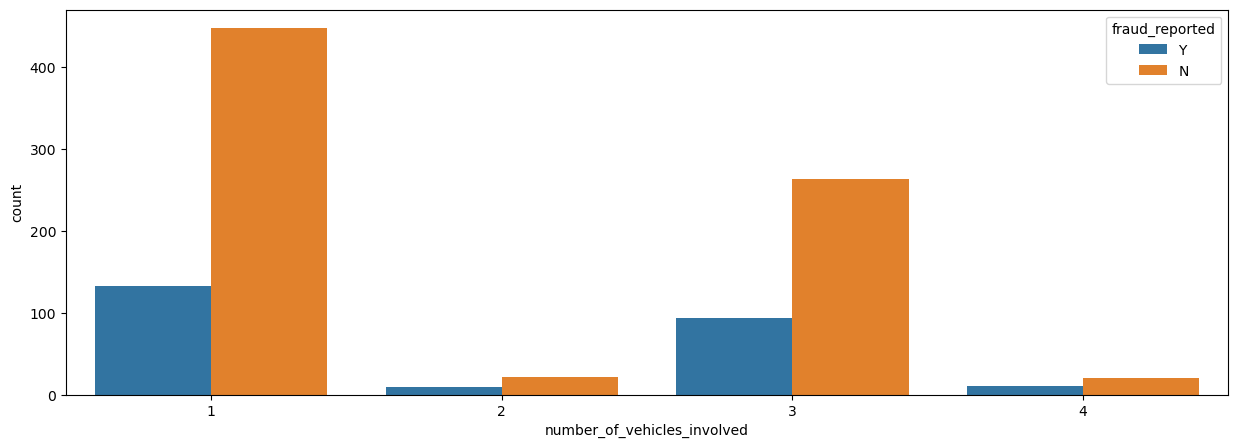

In [19]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x='number_of_vehicles_involved',hue = 'fraud_reported')

([<matplotlib.patches.Wedge at 0x29b78731b20>,
 [Text(1.0030850088589849, 1.3100841442450826, 'Police'),
  Text(-1.3558815633226935, 0.9402580423700766, 'Fire'),
  Text(-1.2445147778088432, -1.0833664974584574, 'Other'),
  Text(0.6170326602391529, -1.5302845147874282, 'Ambulance'),
  Text(1.5830305594774605, -0.4653109151529535, 'None')],
 [Text(0.5471372775594463, 0.7145913514064086, '29.2%'),
  Text(-0.7395717618123782, 0.5128680231109508, '22.3%'),
  Text(-0.6788262424411872, -0.5909271804318857, '19.8%'),
  Text(0.3365632692213561, -0.8347006444295061, '19.6%'),
  Text(0.8634712142604328, -0.25380595371979275, '9.1%')])

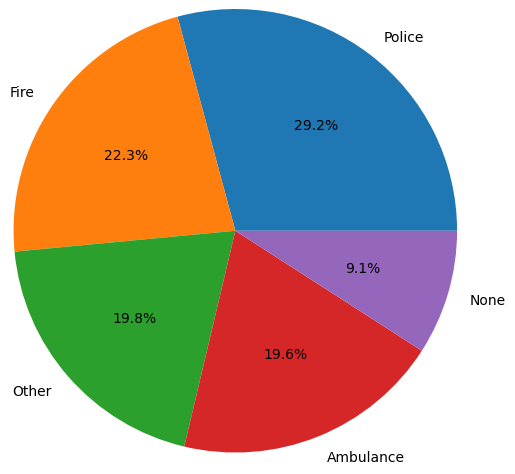

In [20]:

plt.pie(df['authorities_contacted'].value_counts().values,labels=df['authorities_contacted'].value_counts().index,autopct='%0.1f%%',radius=1.5)

In Majority of cases Authorities involved are Police

<AxesSubplot: xlabel='incident_state', ylabel='count'>

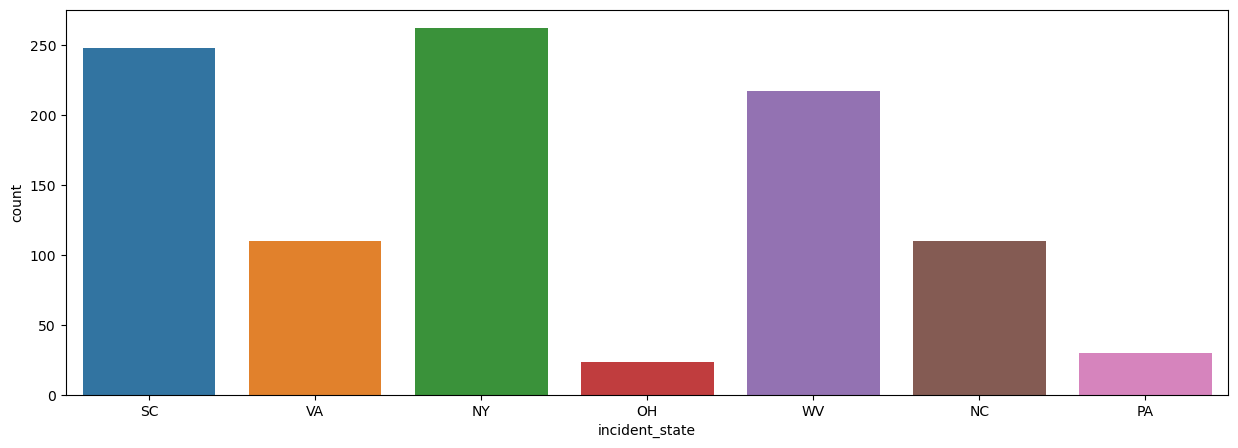

In [21]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x='incident_state')

Most claims occured in NY and SC states and Least Claims Occured in OH State

<AxesSubplot: xlabel='policy_bind_date', ylabel='incident_date'>

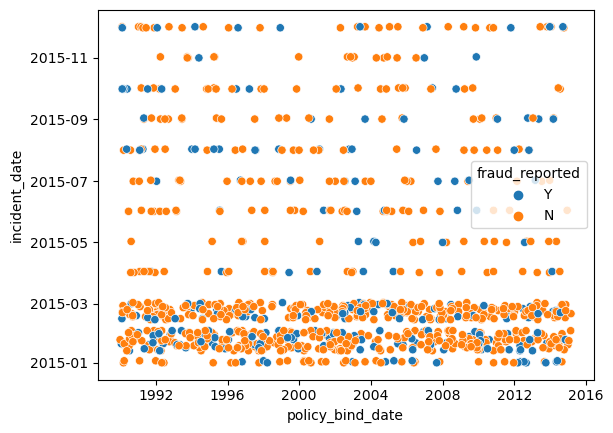

In [22]:
sns.scatterplot(data=df,x='policy_bind_date',y='incident_date',hue='fraud_reported')

No Much Relation Between Both Date columns and Fraud Reportd can be observed

<AxesSubplot: xlabel='months_as_customer', ylabel='total_claim_amount'>

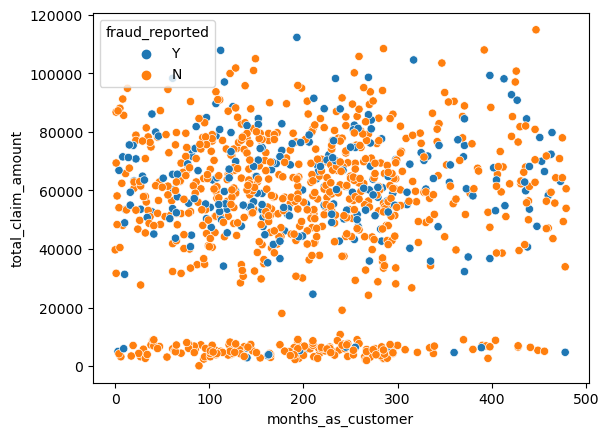

In [23]:
sns.scatterplot(data=df,x='months_as_customer',y='total_claim_amount',hue='fraud_reported')

- No Much Relation Between Total claim amount and Months as customer can be observed
- When claim amount is less than 20000, most claims Tend to be non fraudulent

<AxesSubplot: xlabel='insured_hobbies', ylabel='total_claim_amount'>

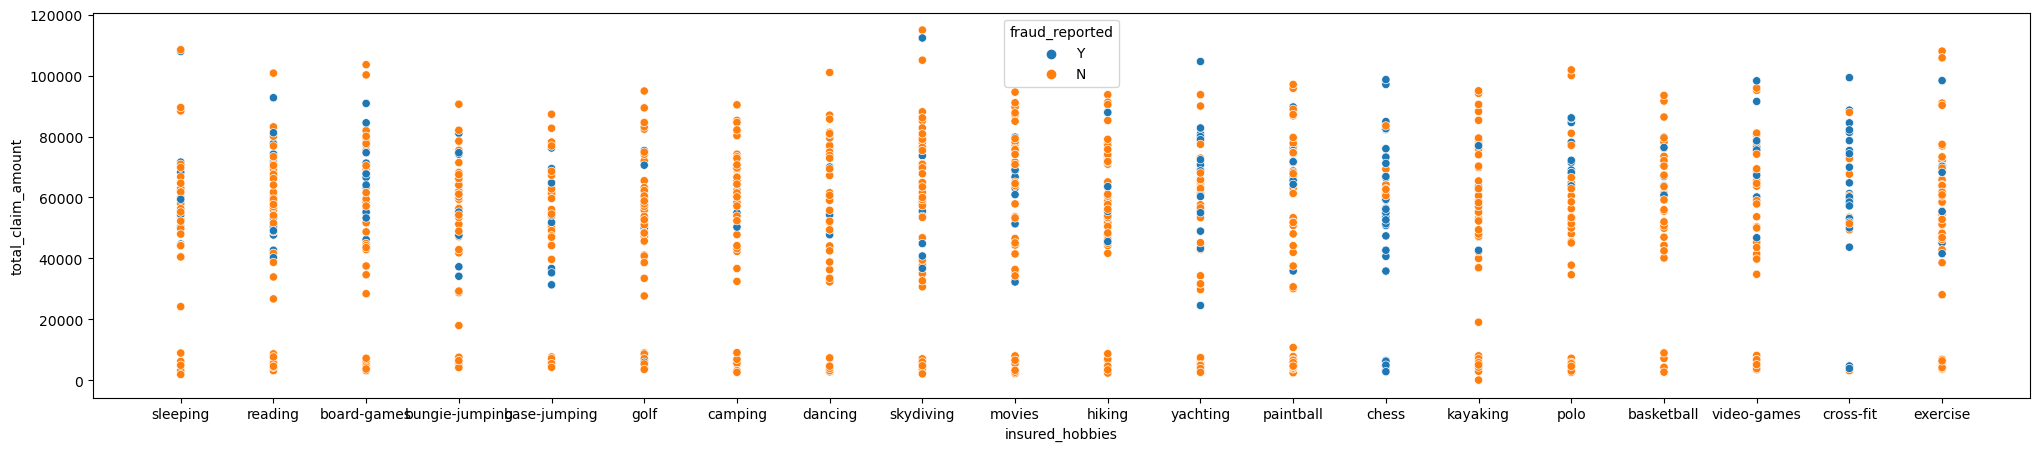

In [24]:
plt.figure(figsize=(25,5))
sns.scatterplot(data=df,x='insured_hobbies',y='total_claim_amount',hue='fraud_reported')

Most of the claims are fraud when insured_hobbies is chess and cross-fit

### PreProcessing

In [25]:
# Removing Unwanted Columns
df.drop(columns=['policy_number','incident_location','insured_zip','auto_model','incident_city'],inplace=True)

In [26]:
# Dropping duplicates If any
df.drop_duplicates(inplace=True)

In [27]:
num_col = []
obj_col = []
cat_col = []
ncat_col = []
for i in df.columns:
    if df[i].nunique() <= 16:
        cat_col.append(i)
    else:
        ncat_col.append(i)

    if df[i].dtype == object:
        obj_col.append(i)
    else :
        num_col.append(i)      

Encoading Object columns

In [28]:
# Label encoading Boolen columns
from sklearn.preprocessing import LabelEncoder
lben= LabelEncoder()
for i in obj_col:
    if df[i].nunique() == 2:
        df[i]= lben.fit_transform(df[i])
        label_mapping = dict(zip(lben.classes_, lben.transform(lben.classes_)))
        print("Label mapping:", label_mapping)


Label mapping: {'FEMALE': 0, 'MALE': 1}
Label mapping: {'NO': 0, 'YES': 1}
Label mapping: {'NO': 0, 'YES': 1}
Label mapping: {'N': 0, 'Y': 1}


In [29]:
# Ordinal Encoading of Education Level Column
df['insured_education_level']=df['insured_education_level'].replace({'High School': 0,'Associate': 1,'College': 2,'JD': 3,'MD': 4,'Masters': 5,'PhD': 6})


In [30]:

from category_encoders import BinaryEncoder
ben = BinaryEncoder()
df = ben.fit_transform(df)        

In [31]:
df.head(4)

,months_as_customer,age,policy_bind_date,policy_state_0,policy_state_1,policy_csl_0,policy_csl_1,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation_0,insured_occupation_1,insured_occupation_2,insured_occupation_3,insured_hobbies_0,insured_hobbies_1,insured_hobbies_2,insured_hobbies_3,insured_hobbies_4,insured_relationship_0,insured_relationship_1,insured_relationship_2,capital-gains,capital-loss,incident_date,incident_type_0,incident_type_1,incident_type_2,collision_type_0,collision_type_1,incident_severity_0,incident_severity_1,incident_severity_2,authorities_contacted_0,authorities_contacted_1,authorities_contacted_2,incident_state_0,incident_state_1,incident_state_2,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make_0,auto_make_1,auto_make_2,auto_make_3,auto_year,fraud_reported
0,328,48,2014-10-17,0,1,0,1,1000,1406.91,0,1,4,0,0,0,1,0,0,0,0,1,0,0,1,53300,0,2015-01-25,0,0,1,0,1,0,0,1,0,0,1,0,0,1,5,1,1,1,2,1,71610,6510,13020,52080,0,0,0,1,2004,1
1,228,42,2006-06-27,1,0,0,1,2000,1197.22,5000000,1,4,0,0,1,0,0,0,0,1,0,0,1,0,0,0,2015-01-21,0,1,0,1,0,0,1,0,0,0,1,0,1,0,8,1,0,0,0,0,5070,780,780,3510,0,0,1,0,2007,1
2,134,29,2000-06-09,0,1,1,0,2000,1413.14,5000000,0,6,0,0,1,1,0,0,0,1,1,0,1,1,35100,0,2015-02-22,0,1,1,1,0,0,1,0,0,0,1,0,1,1,7,3,0,2,3,0,34650,7700,3850,23100,0,0,1,1,2007,0
3,256,41,1990-05-25,1,1,0,1,2000,1415.74,6000000,0,6,0,1,0,0,0,0,0,1,1,1,0,0,48900,-62400,2015-10-01,0,0,1,1,1,0,0,1,0,0,1,1,0,0,5,1,0,1,2,0,63400,6340,6340,50720,0,1,0,0,2014,1


### Outliers

In [32]:
num_col.remove('policy_bind_date')
num_col.remove('incident_date')

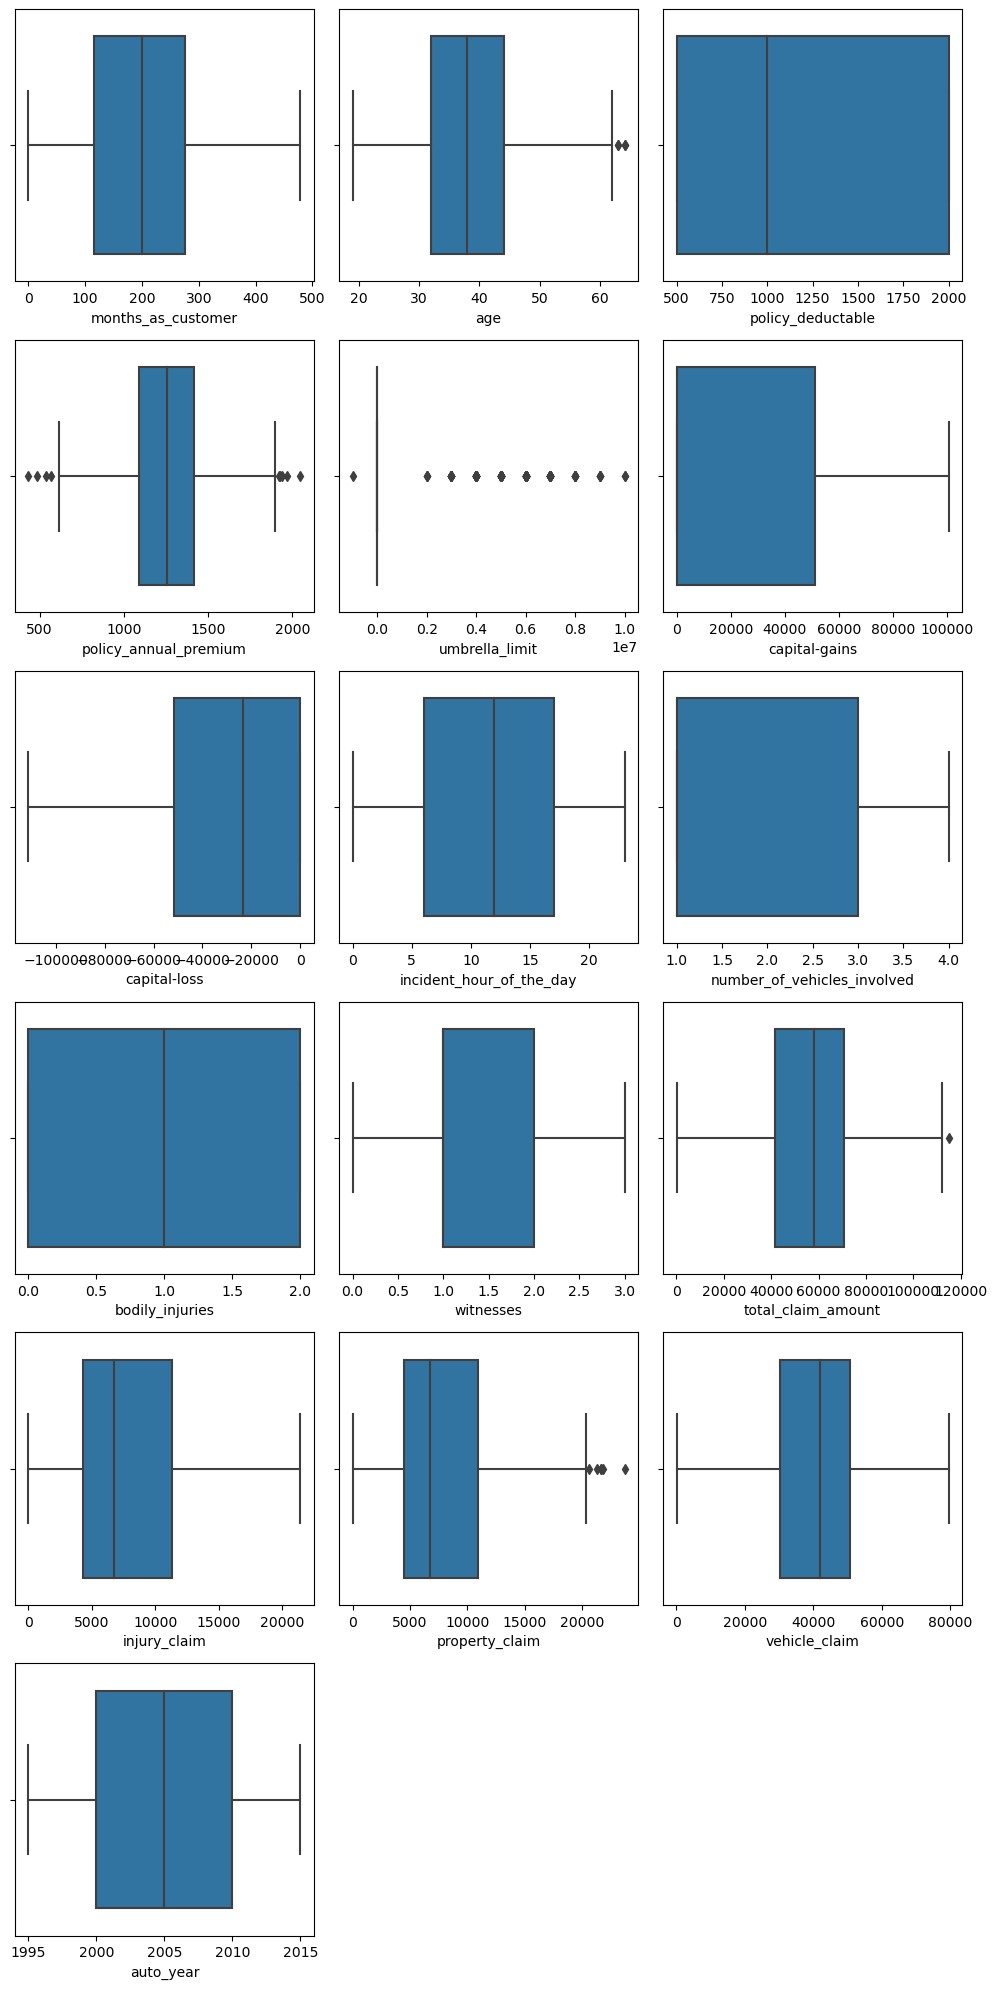

In [33]:
plt.figure(figsize=(10,20))
pn=1
for i in num_col:
    sns.boxplot(data=df,x=i,ax=plt.subplot(6,3,pn))
    pn+=1
plt.tight_layout()    

- There are Few outliers which are needed to be removed
- we shell use z-score for Removing outliers

In [34]:
prev = df.shape

In [35]:
# finding outliers using z score
from scipy.stats import zscore
z = np.abs(zscore(df[num_col[:2]+ num_col[3:]]))
z[z>3].count()

months_as_customer              0
age                             0
policy_annual_premium           3
umbrella_limit                 15
capital-gains                   0
capital-loss                    1
incident_hour_of_the_day        0
number_of_vehicles_involved     0
bodily_injuries                 0
witnesses                       0
total_claim_amount              0
injury_claim                    0
property_claim                  1
vehicle_claim                   0
auto_year                       0
dtype: int64

In [36]:
df[num_col[:2]+ num_col[3:]] = df[num_col[:2]+ num_col[3:]][z<3]
df = df.dropna()
df.reset_index(drop=True,inplace=True)
df

,months_as_customer,age,policy_bind_date,policy_state_0,policy_state_1,policy_csl_0,policy_csl_1,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation_0,insured_occupation_1,insured_occupation_2,insured_occupation_3,insured_hobbies_0,insured_hobbies_1,insured_hobbies_2,insured_hobbies_3,insured_hobbies_4,insured_relationship_0,insured_relationship_1,insured_relationship_2,capital-gains,capital-loss,incident_date,incident_type_0,incident_type_1,incident_type_2,collision_type_0,collision_type_1,incident_severity_0,incident_severity_1,incident_severity_2,authorities_contacted_0,authorities_contacted_1,authorities_contacted_2,incident_state_0,incident_state_1,incident_state_2,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make_0,auto_make_1,auto_make_2,auto_make_3,auto_year,fraud_reported
0,328,48,2014-10-17,0,1,0,1,1000,1406.91,0.0,1,4,0,0,0,1,0,0,0,0,1,0,0,1,53300,0.0,2015-01-25,0,0,1,0,1,0,0,1,0,0,1,0,0,1,5,1,1,1,2,1,71610,6510,13020.0,52080,0,0,0,1,2004,1
1,228,42,2006-06-27,1,0,0,1,2000,1197.22,5000000.0,1,4,0,0,1,0,0,0,0,1,0,0,1,0,0,0.0,2015-01-21,0,1,0,1,0,0,1,0,0,0,1,0,1,0,8,1,0,0,0,0,5070,780,780.0,3510,0,0,1,0,2007,1
2,134,29,2000-06-09,0,1,1,0,2000,1413.14,5000000.0,0,6,0,0,1,1,0,0,0,1,1,0,1,1,35100,0.0,2015-02-22,0,1,1,1,0,0,1,0,0,0,1,0,1,1,7,3,0,2,3,0,34650,7700,3850.0,23100,0,0,1,1,2007,0
3,256,41,1990-05-25,1,1,0,1,2000,1415.74,6000000.0,0,6,0,1,0,0,0,0,0,1,1,1,0,0,48900,-62400.0,2015-10-01,0,0,1,1,1,0,0,1,0,0,1,1,0,0,5,1,0,1,2,0,63400,6340,6340.0,50720,0,1,0,0,2014,1
4,228,44,2014-06-06,1,1,1,1,1000,1583.91,6000000.0,1,1,0,0,1,1,0,0,0,1,1,1,0,0,66000,-46000.0,2015-02-17,0,1,0,1,0,0,1,0,0,1,0,0,1,1,20,1,0,0,1,0,6500,1300,650.0,4550,0,1,0,1,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,3,38,1991-07-16,0,1,1,1,1000,1310.80,0.0,0,5,0,0,0,1,0,1,1,0,1,1,0,0,0,0.0,2015-02-22,0,0,1,1,1,0,1,0,0,1,1,1,1,0,20,1,1,0,1,0,87200,17440,8720.0,61040,1,1,0,1,2006,0
976,285,41,2014-05-01,1,1,1,0,1000,1436.79,0.0,0,6,0,1,1,0,0,0,0,0,1,1,0,1,70900,0.0,2015-01-24,0,0,1,1,0,0,0,1,0,1,1,0,0,1,23,1,1,2,3,0,108480,18080,18080.0,72320,1,1,1,0,2015,0
977,130,34,2003-02-17,0,1,0,1,500,1383.49,3000000.0,0,5,0,1,0,0,0,0,1,0,0,0,1,0,35100,0.0,2015-01-23,0,1,1,0,1,0,1,0,0,0,1,1,1,0,4,3,0,2,3,1,67500,7500,7500.0,52500,1,0,1,0,1996,0
978,458,62,2011-11-18,1,1,1,1,2000,1356.92,5000000.0,1,1,1,1,0,0,0,0,1,0,1,1,0,1,0,0.0,2015-02-26,0,0,1,1,0,0,0,1,1,0,0,0,1,1,2,1,0,0,1,1,46980,5220,5220.0,36540,0,1,1,1,1998,0


In [37]:
df.shape

(980, 57)

In [38]:
print('Data Loss % = ',np.round((prev[0]-df.shape[0])*100/prev[0],2),"%")

Data Loss % =  2.0 %


Since our data loss is only 2% we can continue

#### Corelation Analysis

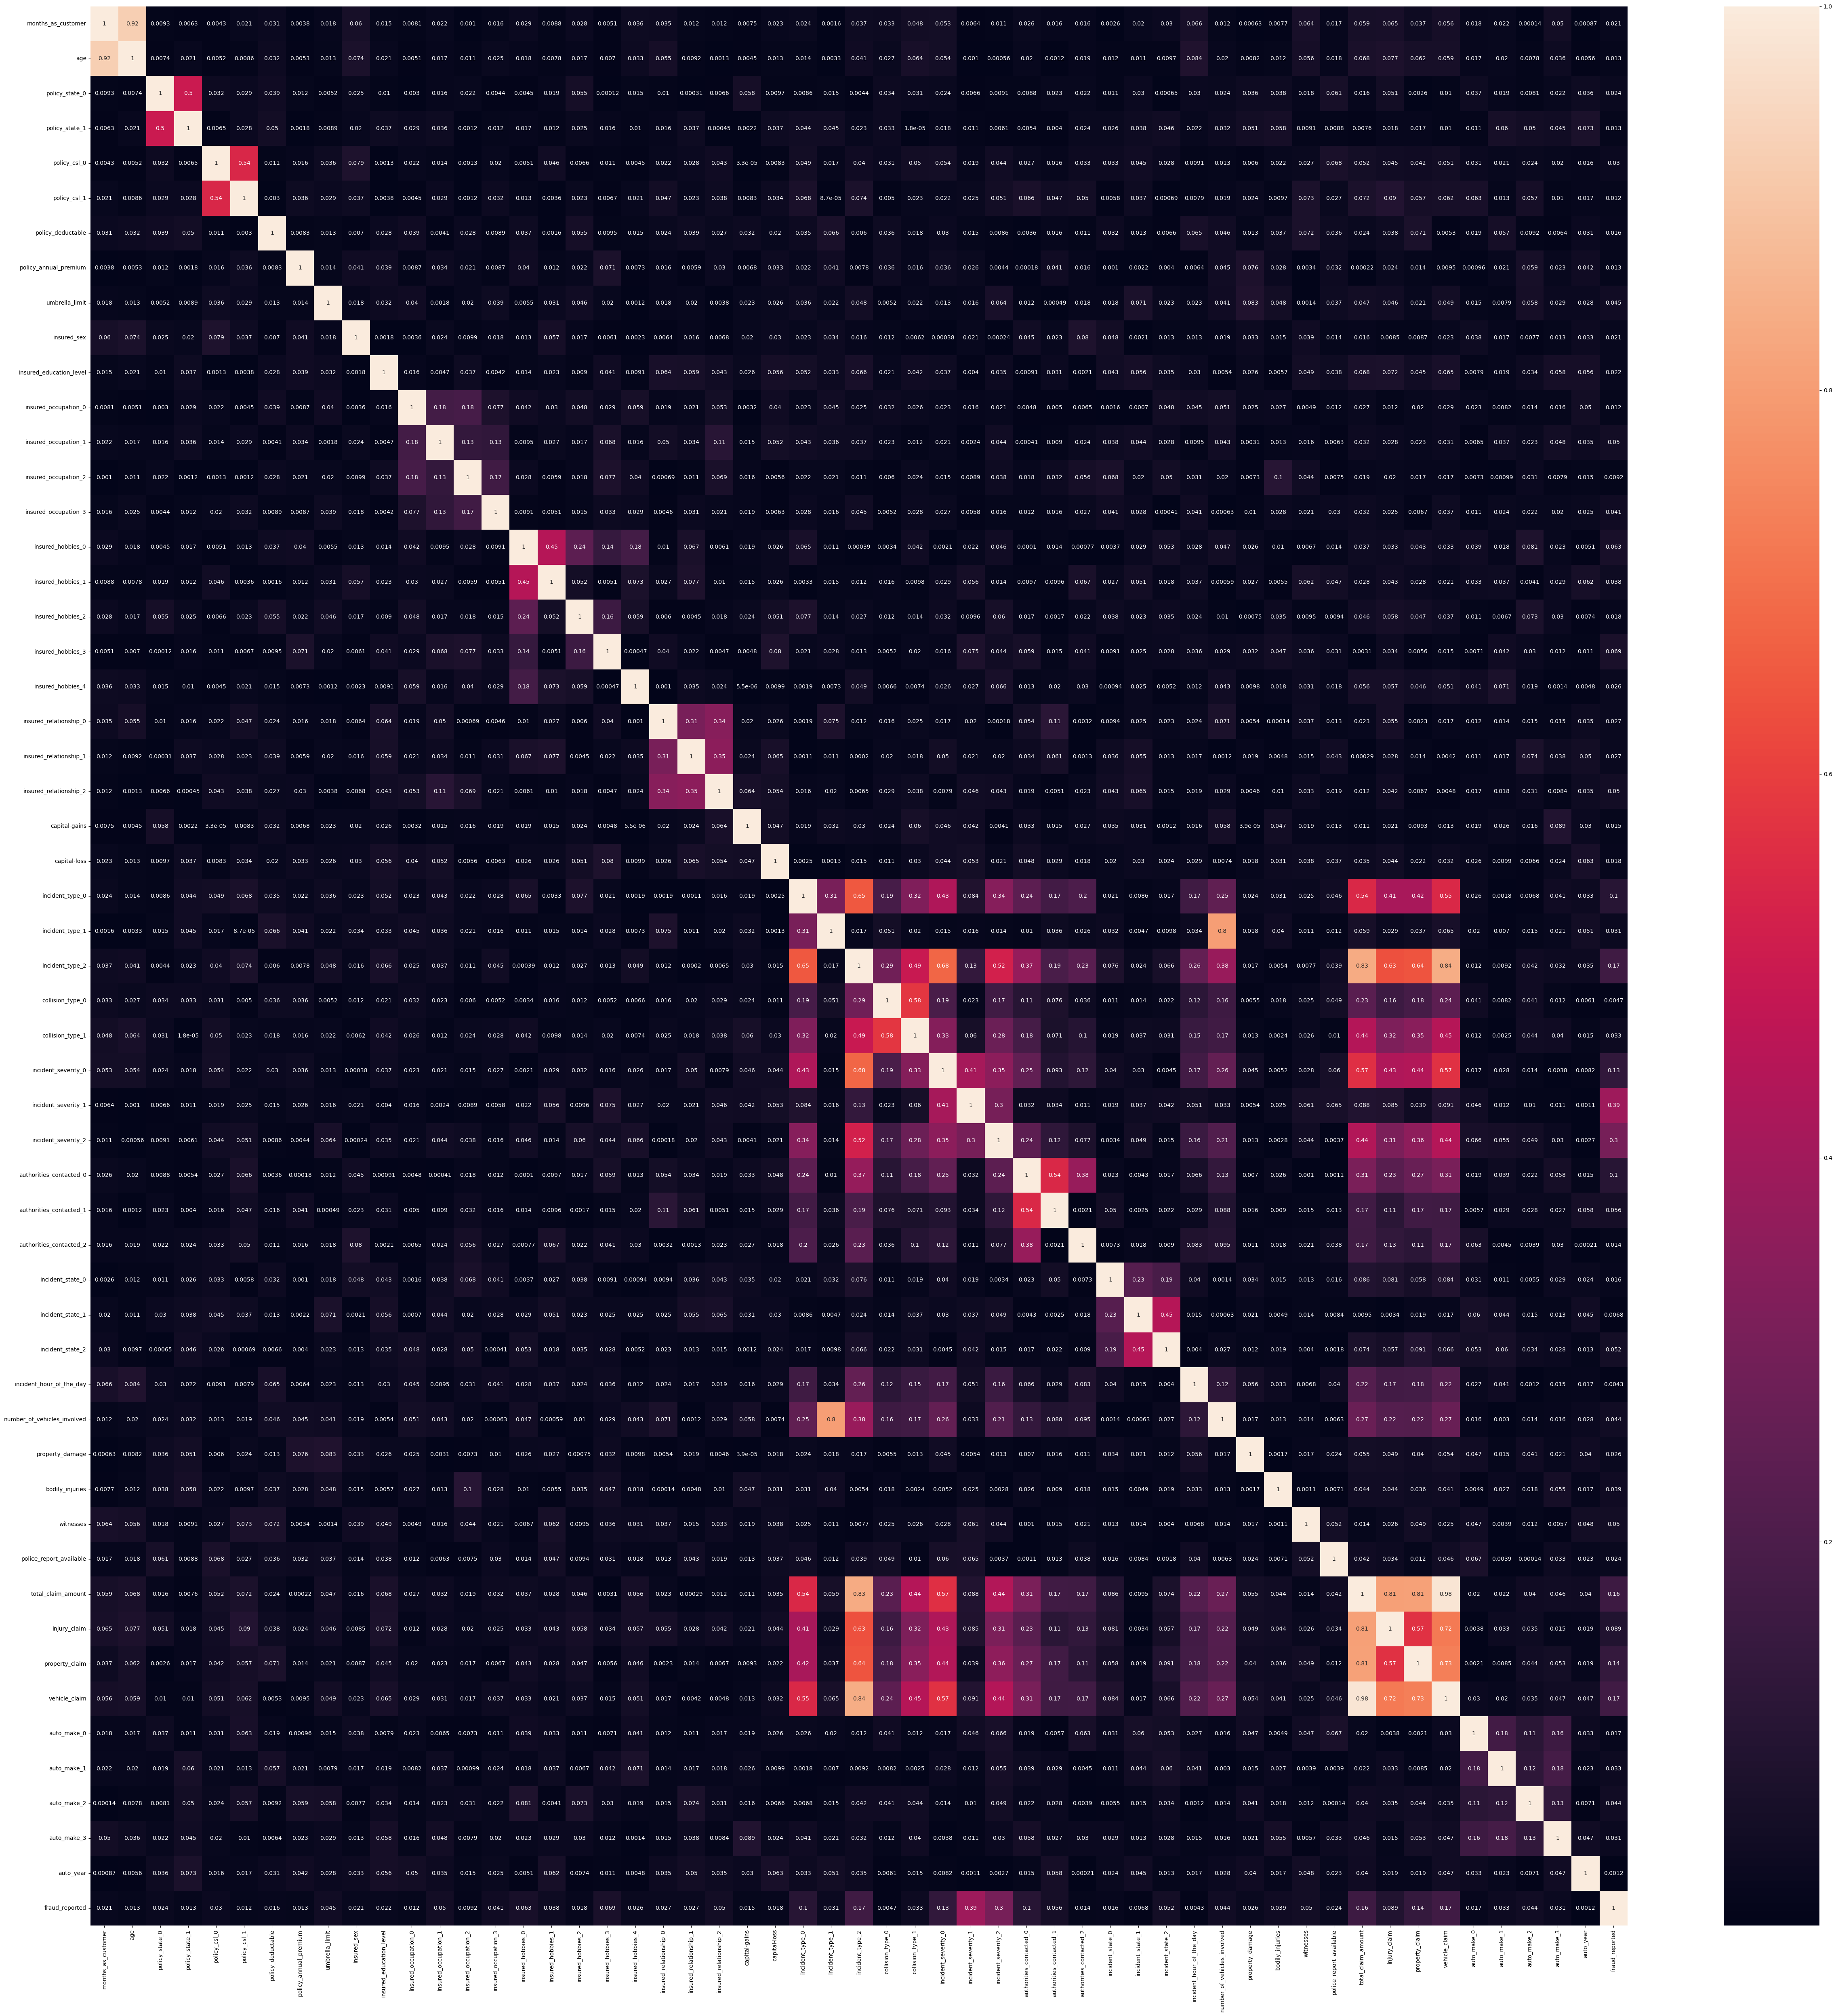

In [39]:
plt.figure(figsize=(50,50))
sns.heatmap(df.corr().abs(),annot=True,annot_kws={'size':10})
plt.tight_layout()

- Multicolinearity Between 'months_as_customer'& 'age','injury_claim'& 'property_claim' observed
- age and injury_claim can be removed
- policy_bind_date,auto_year,incident_hour_of_the_day columns can also be removed as they have very less relation with target

In [40]:
df.drop(columns=['age', 'policy_bind_date','injury_claim','auto_year','incident_hour_of_the_day','incident_date'],inplace = True)

#### Treating Skewness

In [41]:
num_col.remove('age')
num_col.remove('incident_hour_of_the_day')
num_col.remove('injury_claim')
num_col.remove('auto_year')

In [42]:
df[num_col].skew().abs()

months_as_customer             0.362608
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
capital-gains                  0.466619
capital-loss                   0.376884
number_of_vehicles_involved    0.509725
bodily_injuries                0.003757
witnesses                      0.026211
total_claim_amount             0.593593
property_claim                 0.361356
vehicle_claim                  0.620936
dtype: float64

skeweness of Umbrella_limit Needs to be removed

In [43]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson',standardize=False)
df[['umbrella_limit']] = pt.fit_transform(df[['umbrella_limit']])
df

,months_as_customer,policy_state_0,policy_state_1,policy_csl_0,policy_csl_1,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation_0,insured_occupation_1,insured_occupation_2,insured_occupation_3,insured_hobbies_0,insured_hobbies_1,insured_hobbies_2,insured_hobbies_3,insured_hobbies_4,insured_relationship_0,insured_relationship_1,insured_relationship_2,capital-gains,capital-loss,incident_type_0,incident_type_1,incident_type_2,collision_type_0,collision_type_1,incident_severity_0,incident_severity_1,incident_severity_2,authorities_contacted_0,authorities_contacted_1,authorities_contacted_2,incident_state_0,incident_state_1,incident_state_2,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,property_claim,vehicle_claim,auto_make_0,auto_make_1,auto_make_2,auto_make_3,fraud_reported
0,328,0,1,0,1,1000,1406.91,0.000000,1,4,0,0,0,1,0,0,0,0,1,0,0,1,53300,0.0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,1,1,1,2,1,71610,13020.0,52080,0,0,0,1,1
1,228,1,0,0,1,2000,1197.22,604085.739362,1,4,0,0,1,0,0,0,0,1,0,0,1,0,0,0.0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,5070,780.0,3510,0,0,1,0,1
2,134,0,1,1,0,2000,1413.14,604085.739362,0,6,0,0,1,1,0,0,0,1,1,0,1,1,35100,0.0,0,1,1,1,0,0,1,0,0,0,1,0,1,1,3,0,2,3,0,34650,3850.0,23100,0,0,1,1,0
3,256,1,1,0,1,2000,1415.74,705687.617748,0,6,0,1,0,0,0,0,0,1,1,1,0,0,48900,-62400.0,0,0,1,1,1,0,0,1,0,0,1,1,0,0,1,0,1,2,0,63400,6340.0,50720,0,1,0,0,1
4,228,1,1,1,1,1000,1583.91,705687.617748,1,1,0,0,1,1,0,0,0,1,1,1,0,0,66000,-46000.0,0,1,0,1,0,0,1,0,0,1,0,0,1,1,1,0,0,1,0,6500,650.0,4550,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,3,0,1,1,1,1000,1310.80,0.000000,0,5,0,0,0,1,0,1,1,0,1,1,0,0,0,0.0,0,0,1,1,1,0,1,0,0,1,1,1,1,0,1,1,0,1,0,87200,8720.0,61040,1,1,0,1,0
976,285,1,1,1,0,1000,1436.79,0.000000,0,6,0,1,1,0,0,0,0,0,1,1,0,1,70900,0.0,0,0,1,1,0,0,0,1,0,1,1,0,0,1,1,1,2,3,0,108480,18080.0,72320,1,1,1,0,0
977,130,0,1,0,1,500,1383.49,390786.069377,0,5,0,1,0,0,0,0,1,0,0,0,1,0,35100,0.0,0,1,1,0,1,0,1,0,0,0,1,1,1,0,3,0,2,3,1,67500,7500.0,52500,1,0,1,0,0
978,458,1,1,1,1,2000,1356.92,604085.739362,1,1,1,1,0,0,0,0,1,0,1,1,0,1,0,0.0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,1,0,0,1,1,46980,5220.0,36540,0,1,1,1,0


In [44]:
x = df.drop(columns='fraud_reported')
y=df['fraud_reported']

In [45]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           980 non-null    int64  
 1   policy_state_0               980 non-null    int64  
 2   policy_state_1               980 non-null    int64  
 3   policy_csl_0                 980 non-null    int64  
 4   policy_csl_1                 980 non-null    int64  
 5   policy_deductable            980 non-null    int64  
 6   policy_annual_premium        980 non-null    float64
 7   umbrella_limit               980 non-null    float64
 8   insured_sex                  980 non-null    int32  
 9   insured_education_level      980 non-null    int64  
 10  insured_occupation_0         980 non-null    int64  
 11  insured_occupation_1         980 non-null    int64  
 12  insured_occupation_2         980 non-null    int64  
 13  insured_occupation_3

In [46]:
y.value_counts()

0    740
1    240
Name: fraud_reported, dtype: int64

### Resampling

we shall use  Smote

In [47]:

from imblearn.over_sampling import SMOTE


In [48]:

ov_sm = SMOTE(sampling_strategy=0.80)
x,y = ov_sm.fit_resample(x,y)
y.value_counts()

0    740
1    592
Name: fraud_reported, dtype: int64

#### Standerd scaler

In [49]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled,columns=x.columns)
x_scaled

,months_as_customer,policy_state_0,policy_state_1,policy_csl_0,policy_csl_1,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation_0,insured_occupation_1,insured_occupation_2,insured_occupation_3,insured_hobbies_0,insured_hobbies_1,insured_hobbies_2,insured_hobbies_3,insured_hobbies_4,insured_relationship_0,insured_relationship_1,insured_relationship_2,capital-gains,capital-loss,incident_type_0,incident_type_1,incident_type_2,collision_type_0,collision_type_1,incident_severity_0,incident_severity_1,incident_severity_2,authorities_contacted_0,authorities_contacted_1,authorities_contacted_2,incident_state_0,incident_state_1,incident_state_2,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,property_claim,vehicle_claim,auto_make_0,auto_make_1,auto_make_2,auto_make_3
0,1.102464,-1.161553,0.762855,-1.152680,0.867543,-0.239053,0.652210,-0.369431,1.241767,0.620719,-0.777701,-0.830876,-0.889001,1.104536,-0.484228,-0.723897,-0.833461,-0.927543,1.205421,-0.839944,-0.958806,1.166920,1.028229,0.965264,-0.261082,-0.875545,0.419094,-1.438445,1.041397,-0.267584,-0.967495,0.823154,-0.727514,-0.569259,0.723897,-0.689263,-0.890355,0.666847,-0.808579,1.701393,0.107249,0.566396,1.708112,0.695272,1.146003,0.727813,-0.858275,-0.8142,-0.917782,1.126572
1,0.207763,0.860916,-1.310865,-1.152680,0.867543,1.454876,-0.256104,1.553220,1.241767,0.620719,-0.777701,-0.830876,1.124858,-0.905357,-0.484228,-0.723897,-0.833461,1.078118,-0.829586,-0.839944,1.042964,-0.856957,-0.899731,0.965264,-0.261082,1.142146,-2.386099,0.695195,-0.960249,-0.267584,1.033597,-1.214840,-0.727514,-0.569259,0.723897,-0.689263,1.123147,-1.499593,-0.808579,-0.587754,-1.145869,-1.305663,-0.585442,-1.999566,-1.482275,-2.017533,-0.858275,-0.8142,1.089583,-0.887648
2,-0.633256,-1.161553,0.762855,0.867543,-1.152680,1.454876,0.679197,1.553220,-0.805304,1.666637,-0.777701,-0.830876,1.124858,1.104536,-0.484228,-0.723897,-0.833461,1.078118,1.205421,-0.839944,1.042964,1.166920,0.369901,0.965264,-0.261082,1.142146,0.419094,0.695195,-0.960249,-0.267584,1.033597,-1.214840,-0.727514,-0.569259,0.723897,-0.689263,1.123147,0.666847,1.262627,-0.587754,1.360367,1.502426,-0.585442,-0.801590,-0.823058,-0.910238,-0.858275,-0.8142,1.089583,1.126572
3,0.458279,0.860916,0.762855,-1.152680,0.867543,1.454876,0.690459,1.876593,-0.805304,1.666637,-0.777701,1.203549,-0.889001,-0.905357,-0.484228,-0.723897,-0.833461,1.078118,1.205421,1.190556,-0.958806,-0.856957,0.869073,-1.314768,-0.261082,-0.875545,0.419094,0.695195,1.041397,-0.267584,-0.967495,0.823154,-0.727514,-0.569259,0.723897,1.450826,-0.890355,-1.499593,-0.808579,-0.587754,0.107249,0.566396,-0.585442,0.362771,-0.288384,0.650941,-0.858275,1.2282,-0.917782,-0.887648
4,0.207763,0.860916,0.762855,0.867543,0.867543,-0.239053,1.418921,1.876593,1.241767,-0.948157,-0.777701,-0.830876,1.124858,1.104536,-0.484228,-0.723897,-0.833461,1.078118,1.205421,1.190556,-0.958806,-0.856957,1.487612,-0.715529,-0.261082,1.142146,-2.386099,0.695195,-0.960249,-0.267584,1.033597,-1.214840,-0.727514,1.756670,-1.381411,-0.689263,1.123147,0.666847,-0.808579,-0.587754,-1.145869,-0.369633,-0.585442,-1.941651,-1.510190,-1.958749,-0.858275,1.2282,-0.917782,1.126572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327,2.310311,-1.161553,-1.310865,0.867543,-1.152680,1.454876,0.896271,-0.369431,-0.805304,0.097760,-0.777701,-0.830876,-0.889001,1.104536,-0.484228,1.381411,-0.833461,-0.927543,-0.829586,-0.839944,-0.958806,-0.856957,1.302267,0.965264,-0.261082,-0.875545,0.419094,-1.438445,1.041397,-0.267584,-0.967495,0.823154,1.374544,-0.569259,-1.381411,-0.689263,-0.890355,0.666847,-0.808579,-0.587754,0.107249,0.566396,-0.585442,0.202839,0.795512,0.107920,-0.858275,1.2282,-0.917782,-0.887648
1328,0.619325,-1.161553,-1.310865,

### Train test Split

In [50]:
from sklearn.metrics import roc_curve,roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [51]:
# creating df for storing acuracy  score
tts_df = pd.DataFrame(data=None,columns=['Random state','Train accuracy','Test accuracy'])

In [52]:
# finding best random state
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=i)
    log_reg.fit(x_train,y_train)
    pred_train = log_reg.predict(x_train)
    pred_test = log_reg.predict(x_test)
    train_acc = accuracy_score(y_train,pred_train)
    test_acc = accuracy_score(y_test,pred_test)
    if round(train_acc*100,0) == round(test_acc*100,0):
        tts_df =tts_df.append({'Random state':i,'Train accuracy':train_acc*100,'Test accuracy':test_acc*100},ignore_index=True)

    
tts_df.sort_values('Train accuracy',ascending=False)  

    
    

,Random state,Train accuracy,Test accuracy
87,636.0,86.086086,85.585586
61,454.0,86.086086,85.585586
76,560.0,85.985986,85.885886
8,69.0,85.985986,85.885886
48,351.0,85.885886,85.585586
...,...,...,...
25,154.0,84.584585,84.984985
6,49.0,84.584585,85.285285
0,1.0,84.584585,85.285285
54,396.0,84.484484,84.384384


- we can observe that Random state 636 we get max accuracy wit minimum difference

In [53]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=636)

### Training the model

In [54]:
# Defining training model
def mod_train (model,x_tr,x_te,y_tr,y_te):
    model.fit(x_tr,y_tr)
    return accuracy_score(y_te,model.predict(x_te))


Logistic regression 

In [55]:
lr = LogisticRegression()
lr_ac_score = mod_train(lr,x_train,x_test,y_train,y_test)
# Find best cv
from sklearn.model_selection import cross_val_score
for i in range(4,10):
    lr_cv_score=cross_val_score(lr,x_scaled,y,cv=i).mean()
    print('\ncv = ',i,'\nCross Validation score = ',lr_cv_score*100,'\nAccuracy score',lr_ac_score*100,end = '\n\n')
    


cv =  4 
Cross Validation score =  82.50750750750751 
Accuracy score 85.58558558558559


cv =  5 
Cross Validation score =  82.45501393934275 
Accuracy score 85.58558558558559


cv =  6 
Cross Validation score =  83.55855855855857 
Accuracy score 85.58558558558559


cv =  7 
Cross Validation score =  83.35629650041334 
Accuracy score 85.58558558558559


cv =  8 
Cross Validation score =  83.36384459995672 
Accuracy score 85.58558558558559


cv =  9 
Cross Validation score =  83.70870870870871 
Accuracy score 85.58558558558559



- cv = 9 is giving best result

In [56]:
cv = 9

In [57]:
# creating df for storing cv score and acc score
ms_df = pd.DataFrame(data=None,columns=['Model','CV score','Test accuracy','Difference'])

In [58]:
lr_s_cv_score=cross_val_score(lr,x_scaled,y,cv=cv).mean()
print('\nCross Validation score = ',lr_s_cv_score*100,'\nAccuracy score = ',lr_ac_score*100,'\nDifference = ',lr_ac_score*100-(lr_s_cv_score*100))
ms_df = ms_df.append({'Model':'Logistic regression','CV score':round(lr_s_cv_score*100,2),'Test accuracy':round(lr_ac_score*100,2),'Difference':round(np.abs(lr_ac_score*100-(lr_s_cv_score*100)),2)},ignore_index=True)


Cross Validation score =  83.70870870870871 
Accuracy score =  85.58558558558559 
Difference =  1.876876876876878


##### Random  forest classifer

In [59]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc_ac_score = mod_train(rfc,x_train,x_test,y_train,y_test)

# cross validation
rfc_s_cv_score_mean=cross_val_score(rfc,x_scaled,y,cv=cv).mean()
print('\nCross Validation score = ',rfc_s_cv_score_mean*100,'\nAccuracy score = ',rfc_ac_score*100,'\nDifference = ',np.abs(rfc_ac_score*100-(rfc_s_cv_score_mean*100)))
ms_df = ms_df.append({'Model':'Random forest classifier','CV score':round(rfc_s_cv_score_mean*100,2),'Test accuracy':round(rfc_ac_score*100,2),'Difference':round(np.abs(rfc_ac_score*100-(rfc_s_cv_score_mean*100)),2)},ignore_index=True)



Cross Validation score =  84.75975975975976 
Accuracy score =  85.28528528528528 
Difference =  0.5255255255255236


##### AdaBoostClassifier

In [60]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()
abc_ac_score = mod_train(abc,x_train,x_test,y_train,y_test)

# cross validation
abc_s_cv_score_mean=cross_val_score(abc,x_scaled,y,cv=cv).mean()
print('\nCross Validation score = ',abc_s_cv_score_mean*100,'\nAccuracy score = ',abc_ac_score*100,'\nDifference = ',np.abs(abc_ac_score*100-(abc_s_cv_score_mean*100)))
ms_df = ms_df.append({'Model':'AdaBoost Classifier','CV score':round(abc_s_cv_score_mean*100,2),'Test accuracy':round(abc_ac_score*100,2),'Difference':round(np.abs(abc_ac_score*100-(abc_s_cv_score_mean*100)),2)},ignore_index=True)



Cross Validation score =  82.5825825825826 
Accuracy score =  85.28528528528528 
Difference =  2.7027027027026804


##### GradientBoostingClassifier

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc_ac_score = mod_train(gbc,x_train,x_test,y_train,y_test)

# cross validation
gbc_s_cv_score_mean=cross_val_score(gbc,x_scaled,y,cv=cv).mean()
print('\nCross Validation score = ',gbc_s_cv_score_mean*100,'\nAccuracy score = ',gbc_ac_score*100,'\nDifference = ',np.abs(gbc_ac_score*100-(gbc_s_cv_score_mean*100)))
ms_df = ms_df.append({'Model':'Gradient Boosting Classifier','CV score':round(gbc_s_cv_score_mean*100,2),'Test accuracy':round(gbc_ac_score*100,2),'Difference':round(np.abs(gbc_ac_score*100-(gbc_s_cv_score_mean*100)),2)},ignore_index=True)



Cross Validation score =  84.23423423423424 
Accuracy score =  85.88588588588588 
Difference =  1.6516516516516475


##### XGBClassifier

In [62]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb_ac_score = mod_train(xgb,x_train,x_test,y_train,y_test)

# cross validation
xgb_s_cv_score_mean=cross_val_score(xgb,x_scaled,y,cv=cv).mean()
print('\nCross Validation score = ',xgb_s_cv_score_mean*100,'\nAccuracy score = ',xgb_ac_score*100,'\nDifference = ',np.abs(xgb_ac_score*100-(xgb_s_cv_score_mean*100)))
ms_df = ms_df.append({'Model':'XGBoost Classifier','CV score':round(xgb_s_cv_score_mean*100,2),'Test accuracy':round(xgb_ac_score*100,2),'Difference':round(np.abs(xgb_ac_score*100-(xgb_s_cv_score_mean*100)),2)},ignore_index=True)



Cross Validation score =  84.98498498498498 
Accuracy score =  87.08708708708708 
Difference =  2.1021021021021085


##### SVC

In [63]:
from sklearn.svm import SVC
svc = SVC()
svc_ac_score = mod_train(svc,x_train,x_test,y_train,y_test)

# cross validation
svc_s_cv_score_mean=cross_val_score(svc,x_scaled,y,cv=cv).mean()
print('\nCross Validation score = ',svc_s_cv_score_mean*100,'\nAccuracy score = ',svc_ac_score*100,'\nDifference = ',np.abs(svc_ac_score*100-(svc_s_cv_score_mean*100)))
ms_df = ms_df.append({'Model':'SVC','CV score':round(svc_s_cv_score_mean*100,2),'Test accuracy':round(svc_ac_score*100,2),'Difference':round(np.abs(svc_ac_score*100-(svc_s_cv_score_mean*100)),2)},ignore_index=True)



Cross Validation score =  83.4834834834835 
Accuracy score =  86.18618618618619 
Difference =  2.7027027027026946


##### KNN

In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_ac_score = mod_train(knn,x_train,x_test,y_train,y_test)

# cross validation
knn_s_cv_score_mean=cross_val_score(knn,x_scaled,y,cv=cv).mean()
print('\nCross Validation score = ',knn_s_cv_score_mean*100,'\nAccuracy score = ',knn_ac_score*100,'\nDifference = ',np.abs(knn_ac_score*100-(knn_s_cv_score_mean*100)))
ms_df = ms_df.append({'Model':'KNN Classifier','CV score':round(knn_s_cv_score_mean*100,2),'Test accuracy':round(knn_ac_score*100,2),'Difference':round(np.abs(knn_ac_score*100-(knn_s_cv_score_mean*100)),2)},ignore_index=True)



Cross Validation score =  84.30930930930931 
Accuracy score =  82.58258258258259 
Difference =  1.7267267267267243


In [65]:
ms_df.sort_values('Test accuracy',ascending=False)

,Model,CV score,Test accuracy,Difference
4,XGBoost Classifier,84.98,87.09,2.10
5,SVC,83.48,86.19,2.70
3,Gradient Boosting Classifier,84.23,85.89,1.65
0,Logistic regression,83.71,85.59,1.88
1,Random forest classifier,84.76,85.29,0.53
2,AdaBoost Classifier,82.58,85.29,2.70
6,KNN Classifier,84.31,82.58,1.73


- we can observe that XGboost Classifier is giving good accuracy 

### Hyperparameter Tuning

In [67]:
from sklearn.model_selection import GridSearchCV
param_grid  = {
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}

In [68]:
# using grid search cv
gcv = GridSearchCV(estimator=XGBClassifier(),param_grid=param_grid,cv=9,scoring='accuracy',n_jobs=-1)
gcv.fit(x_train,y_train)

# Print the best parameters and score
print("Best parameters:", gcv.best_params_)
print("Best score:", gcv.best_score_)

Best parameters: {'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.01, 'reg_alpha': 0, 'reg_lambda': 0, 'subsample': 1.0}
Best score: 0.8648648648648649


### Training with best parms

In [69]:
final_model = XGBClassifier(colsample_bytree= 0.9, gamma= 0, learning_rate= 0.01, reg_alpha= 0, reg_lambda= 0, subsample= 1.0)
final_model.fit(x_train,y_train)
final_model_test_pred=final_model.predict(x_test)
final_model_ac_score = accuracy_score(y_test,final_model_test_pred)*100
print (final_model_ac_score)

86.18618618618619


In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test,final_model_test_pred))


              precision    recall  f1-score   support

           0       0.91      0.85      0.88       200
           1       0.80      0.87      0.83       133

    accuracy                           0.86       333
   macro avg       0.85      0.86      0.86       333
weighted avg       0.87      0.86      0.86       333



#### roc curve

In [71]:
fpr,tpr,threshold = roc_curve(y_test,final_model_test_pred)

In [72]:
print("fpr = ",fpr,'\ntpr = ',tpr,'\nthreshold = ',threshold)

fpr =  [0.    0.145 1.   ] 
tpr =  [0.         0.87218045 1.        ] 
threshold =  [2 1 0]


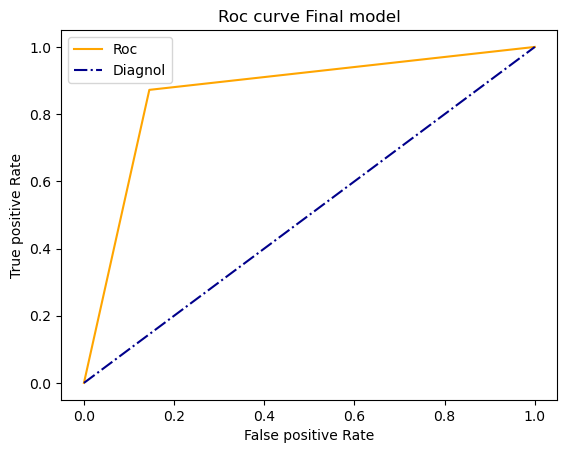

In [73]:
plt.plot(fpr,tpr,color='orange',label = 'Roc') # x axis , y axis ,clr, lable
plt.plot([0,1],[0,1],color='darkblue',linestyle='-.',label = "Diagnol")
plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.title('Roc curve Final model')
plt.legend()
plt.show()

In [74]:
import pickle
with open('final_xgb_classifier_model.pkl', 'wb') as file:
    pickle.dump(final_model, file)

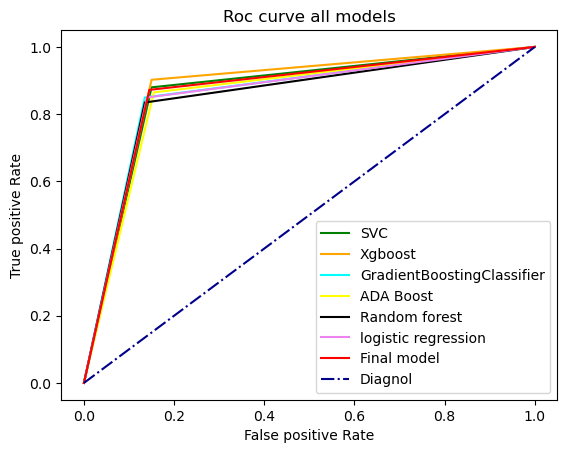

In [75]:
fpr1,tpr1,threshold = roc_curve(y_test,final_model_test_pred)
fpr2,tpr2,threshold = roc_curve(y_test,svc.predict(x_test))
fpr3,tpr3,threshold = roc_curve(y_test,xgb.predict(x_test))
fpr4,tpr4,threshold = roc_curve(y_test,gbc.predict(x_test))
fpr5,tpr5,threshold = roc_curve(y_test,abc.predict(x_test))
fpr6,tpr6,threshold = roc_curve(y_test,rfc.predict(x_test))
fpr7,tpr7,threshold = roc_curve(y_test,lr.predict(x_test))



plt.plot(fpr2,tpr2,color='green',label = 'SVC') # x axis , y axis ,clr, lable
plt.plot(fpr3,tpr3,color='orange',label = 'Xgboost')
plt.plot(fpr4,tpr4,color='cyan',label = 'GradientBoostingClassifier') 
plt.plot(fpr5,tpr5,color='yellow',label = 'ADA Boost') 
plt.plot(fpr6,tpr6,color='black',label = 'Random forest') 
plt.plot(fpr7,tpr7,color='violet',label = 'logistic regression') 
plt.plot(fpr1,tpr1,color='red',label = 'Final model')
plt.plot([0,1],[0,1],color='darkblue',linestyle='-.',label = "Diagnol")
plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.title('Roc curve all models')
plt.legend()
plt.show()

### Saving Model

In [76]:
import pickle
with open('final_LR_classifier_model.pkl', 'wb') as file:
    pickle.dump(final_model, file)

### Conclusion

- Our Final Model Predicts Income with Almost 86%  Test Accuracy and it is the least over_fitting model(less difference between cv score and Test accuracy)
- From Accuracy Scor and ROC_GRAPH we can say That Our Model Is Best Model